In [1]:
from nltk import sent_tokenize, pos_tag
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.util import mark_negation
from string import punctuation
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

### Sentiment Scoring Using SentiWordNet

In [2]:
def penn_to_wn(tag):
    """
        Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [20]:
def get_sentiment_score(text):
    
    """
        This method returns the sentiment score of a given text using SentiWordNet sentiment scores.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0
    #print(text)
    raw_sentences = sent_tokenize(text)
    #print(raw_sentences)
    
    for sentence in raw_sentences:

        sent_score = 0     
        sentence = str(sentence)
        #print(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        tags = pos_tag(tokens)
        for word, tag in tags:
            wn_tag = penn_to_wn(tag)
            if not wn_tag:
                continue
            lemma = WordNetLemmatizer().lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sent_score += swn_synset.pos_score() - swn_synset.neg_score()

        total_score = total_score + (sent_score / len(tokens))

    
    return (total_score / len(raw_sentences)) * 100

In [4]:
reviews = pd.read_csv("../data/small_corpus.csv")

In [5]:
reviews.shape

(4500, 12)

In [6]:
reviews.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,False,"11 20, 2006",A1WR2JN6DQ8QDG,B0007M2220,Dee Williams,Ok this game had a neat concept when i was browsing the shelves at my college rental store for games to pick up. I get home and pop it in and it's the worse GTA wannabe game I've ever played and I've played a lot. The idea of having to kill cops is..whatever. The game itself has terrible control and graphics are very choppy\n\nThe A.I. seems to have a brain when it wants to but things are definitely out of wack with this game. In the very beginning of playing I got shot in the foot and my character died.,GTA..It is Not,1163980800,2,{'Platform:': ' Xbox'},NaN
1,1.0,True,"03 3, 2016",A15RW77GD0ACKP,B0016BVYAM,robert,Do not for anyreason buy this game it will not activate no matter what you do and 2k is no help in getting it to activate,Total waste of time and money,1456963200,NaN,{'Format:': ' Video Game'},NaN
2,1.0,False,"11 18, 2005",A1FW98SHQL40L3,B000067FDY,Azaraphel,"I have played Star Wars: Galaxies for 782 days according to the /getvet command. I have purchased all of the expansions out to date. I was considering creating a second account. As of 11-17-05 my account is cancelled. The New Game, also known as the Starter Kit, is the third version of SWG and it is riddled with bugs and incomplete. It is a far inferior product to its previous versions as well. The NG was released after being kept secret for an unknown period of time and allowing players only a two week notice of it being published. Even less time was devoted to it being tested by sources outside of SOE. Trials of Obi Wan and the NG were released in such a manner as to call into question SOE's and LA's ethics. As represented by the employees who post to the forums SOE and LA are uncarring, glib, and/or vastly out of touch with the player community.\n\nMost of these are not new complaints. However, with the release of the NG these problems have escalted to such a degree that the game is no longer playable. While some are content to merely switch games I am not. Simply changing the direction of the flow of money to SOE and LA will not get their attention. I am boycotting all products created by Sony Online Entertainment and Lucas Arts. I encourage others to do the same.\n\nI do not think my actions alone with effect SOE or LA one iota. In fact, I doubt anything will change their policies. The fan base for Star Wars and other properties is sufficiently numerous to mitigate any discontent portion. While some have predicted that the NG will cause the collapse of SWG I believe otherwise. It will lose many current players but those will be replaced by SOE's and LA's new target market. SOE and LA will later use the negative comments and future subscriptions numbers to prove that they were right all along and to dismiss anyone who opposes them as being knee jerk reactionaries who are against change just because they don't like change. Because most likely the next expansion will also bring a new version of SWG as SOE and LA attempt to copy whichever game is doing better then.",Boycott Sony Online Entertainment and Lucas Arts.,1132272000,4,NaN,NaN
3,1.0,True,"04 7, 2015",A37PQG6TMGTKO2,B0007KTBB2,Tony,Was too violent.,One Star,1428364800,NaN,{'Platform:': ' PlayStation2'},NaN
4,1.0,False,"05 1, 2001",AGX7PLR4MIZHR,B00000J9J9,Rob C,"Yes, people, this game sucks big time. This game came with the original Nintendo system back in late 1980s. I had a hard time trying to beat this game because the control was down right horrible. Most of the time you'll jump off edges by accident. And who ... would pay ... to relive the nightmare of this game? Apparent, 82 people who reviewed this game and my friend did.","Terrible then, even worse now",988675200,NaN,NaN,NaN


In [7]:
reviews.dropna(subset=['reviewText'], inplace=True)

In [8]:
reviews.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,False,"11 20, 2006",A1WR2JN6DQ8QDG,B0007M2220,Dee Williams,Ok this game had a neat concept when i was browsing the shelves at my college rental store for games to pick up. I get home and pop it in and it's the worse GTA wannabe game I've ever played and I've played a lot. The idea of having to kill cops is..whatever. The game itself has terrible control and graphics are very choppy\n\nThe A.I. seems to have a brain when it wants to but things are definitely out of wack with this game. In the very beginning of playing I got shot in the foot and my character died.,GTA..It is Not,1163980800,2,{'Platform:': ' Xbox'},NaN
1,1.0,True,"03 3, 2016",A15RW77GD0ACKP,B0016BVYAM,robert,Do not for anyreason buy this game it will not activate no matter what you do and 2k is no help in getting it to activate,Total waste of time and money,1456963200,NaN,{'Format:': ' Video Game'},NaN
2,1.0,False,"11 18, 2005",A1FW98SHQL40L3,B000067FDY,Azaraphel,"I have played Star Wars: Galaxies for 782 days according to the /getvet command. I have purchased all of the expansions out to date. I was considering creating a second account. As of 11-17-05 my account is cancelled. The New Game, also known as the Starter Kit, is the third version of SWG and it is riddled with bugs and incomplete. It is a far inferior product to its previous versions as well. The NG was released after being kept secret for an unknown period of time and allowing players only a two week notice of it being published. Even less time was devoted to it being tested by sources outside of SOE. Trials of Obi Wan and the NG were released in such a manner as to call into question SOE's and LA's ethics. As represented by the employees who post to the forums SOE and LA are uncarring, glib, and/or vastly out of touch with the player community.\n\nMost of these are not new complaints. However, with the release of the NG these problems have escalted to such a degree that the game is no longer playable. While some are content to merely switch games I am not. Simply changing the direction of the flow of money to SOE and LA will not get their attention. I am boycotting all products created by Sony Online Entertainment and Lucas Arts. I encourage others to do the same.\n\nI do not think my actions alone with effect SOE or LA one iota. In fact, I doubt anything will change their policies. The fan base for Star Wars and other properties is sufficiently numerous to mitigate any discontent portion. While some have predicted that the NG will cause the collapse of SWG I believe otherwise. It will lose many current players but those will be replaced by SOE's and LA's new target market. SOE and LA will later use the negative comments and future subscriptions numbers to prove that they were right all along and to dismiss anyone who opposes them as being knee jerk reactionaries who are against change just because they don't like change. Because most likely the next expansion will also bring a new version of SWG as SOE and LA attempt to copy whichever game is doing better then.",Boycott Sony Online Entertainment and Lucas Arts.,1132272000,4,NaN,NaN
3,1.0,True,"04 7, 2015",A37PQG6TMGTKO2,B0007KTBB2,Tony,Was too violent.,One Star,1428364800,NaN,{'Platform:': ' PlayStation2'},NaN
4,1.0,False,"05 1, 2001",AGX7PLR4MIZHR,B00000J9J9,Rob C,"Yes, people, this game sucks big time. This game came with the original Nintendo system back in late 1980s. I had a hard time trying to beat this game because the control was down right horrible. Most of the time you'll jump off edges by accident. And who ... would pay ... to relive the nightmare of this game? Apparent, 82 people who reviewed this game and my friend did.","Terrible then, even worse now",988675200,NaN,NaN,NaN


In [9]:
reviews.shape

(4499, 12)

In [10]:
import nltk
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/paavansai/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [11]:
nltk.download("averaged_perceptron_tagger_eng")

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/paavansai/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [16]:
neg_comment ="The product is worst, never ever buy this kind of product."
pos_comment= "One of the best ones i have seen till date, don't miss it!"

pos_score=get_sentiment_score(pos_comment)
neg_score=get_sentiment_score(neg_comment)

print("positive comment score",pos_score)
print("negetive comment score",neg_score)

positive comment score 5.46875
negetive comment score -10.576923076923077


In [23]:
reviews['swn_score'] = reviews['reviewText'].apply(lambda text : get_sentiment_score(text))

In [24]:
reviews[['reviewText','swn_score']].sample(2)

,reviewText,swn_score
1504,It was overall just OK. Nothing like a Battlefield game. MEH.,1.041667
4174,"I would take the XBOX controller over any controller on any console. This is not to say this is the best controller ever, it is the best for adult hands. It is not really good for childrens or womens hands, but that is not the target market.\nJust take hold of this bad boy and play Halo for 3-4 hours straight, your hands will not hurt and the actions mapped to the buttons are the best in any first person shooter on a console, I don't miss my PCs mouse and keyboard at all.",1.875000


In [25]:
reviews[['reviewText','swn_score']].sample(2)

,reviewText,swn_score
3741,Excellent Product,50.000000
3056,"If you liked Silent Hill (1 or 2), then you should like this one.\nSilent Hill was about flesh, blood, torture, straight-jackets,\ninsane asylums, piles of living flesh, with a strange Hannibal Lector\nlike sexual tone.\nFatal Frame is about a haunted houses, ghosts and ghouls,\ndusty books and chests, spider webs, and white wisps of things that pass by\nyou in the night. Oh, and you can't forget the spine tingling SCREAMS that\necho throughout the mansion.\nDo not play this game in the dark. Unless you want to be throughly\nfreaked out!\nI don't know how many times I wanted to turn around and walk the other\nway. Any sane person would so the same.\nYou actually care for the ""well being"" of the character like if it was yourself!\nExcellent game!",0.725806


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


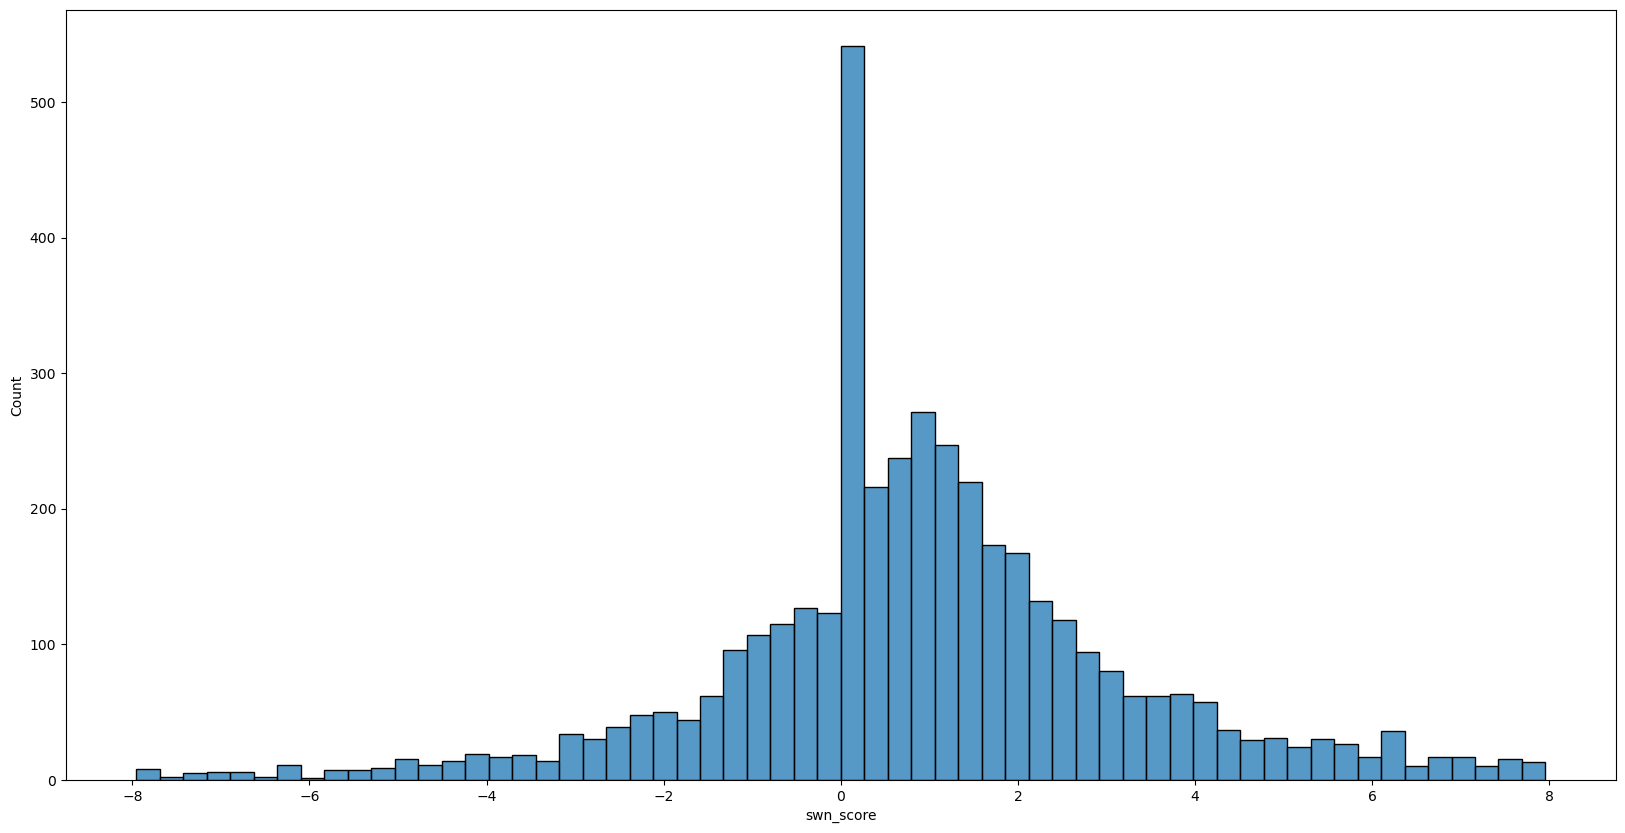

In [26]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='swn_score', data=reviews.query("swn_score < 8 and swn_score > -8"), ax=ax)
plt.show()

In [27]:
reviews['swn_sentiment'] = reviews['swn_score'].apply(lambda x: "positive" if x>1 else ("negative" if x<0.5 else "neutral"))

In [28]:
reviews['swn_sentiment'].value_counts(dropna=False)

swn_sentiment
positive    2167
negative    1851
neutral      481
Name: count, dtype: int64

<Axes: xlabel='overall', ylabel='count'>

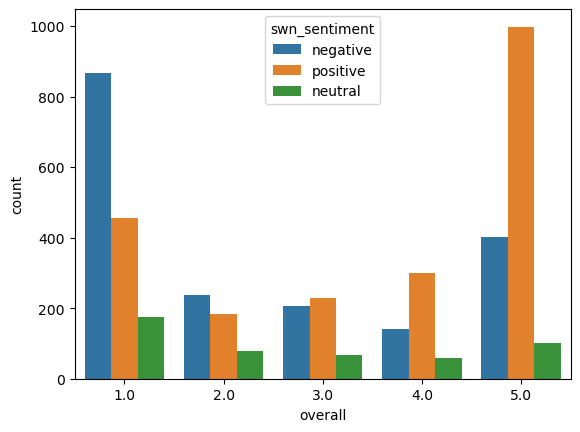

In [29]:
sns.countplot(x='overall', hue='swn_sentiment' ,data = reviews)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='swn_sentiment', ylabel='overall'>

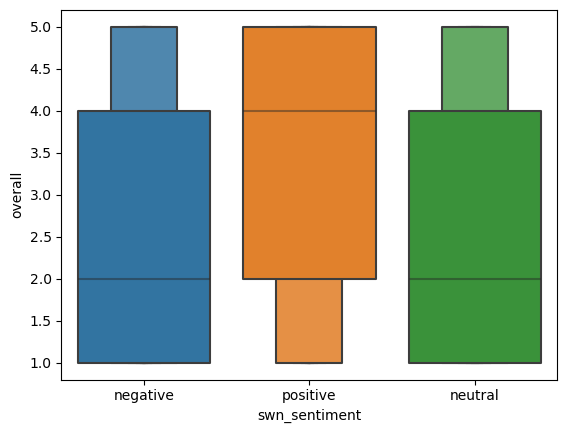

In [30]:
sns.boxenplot(x='swn_sentiment', y='overall', data = reviews)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

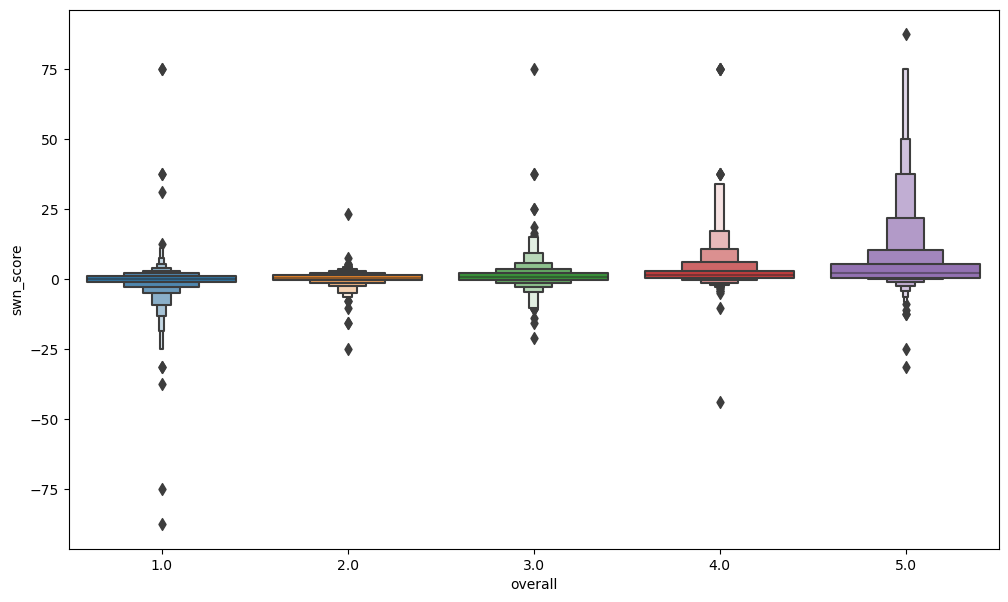

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='overall', y='swn_score', data = reviews, ax=ax)
plt.show()

In [32]:
reviews['true_sentiment'] = \
    reviews['overall'].apply(lambda x: "positive" if x>=4 else ("neutral" if x==3 else "negative"))

In [33]:
y_swn_pred, y_true = reviews['swn_sentiment'].tolist(), reviews['true_sentiment'].tolist()

In [34]:
len(y_swn_pred), len(y_true)

(4499, 4499)

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_swn_pred)

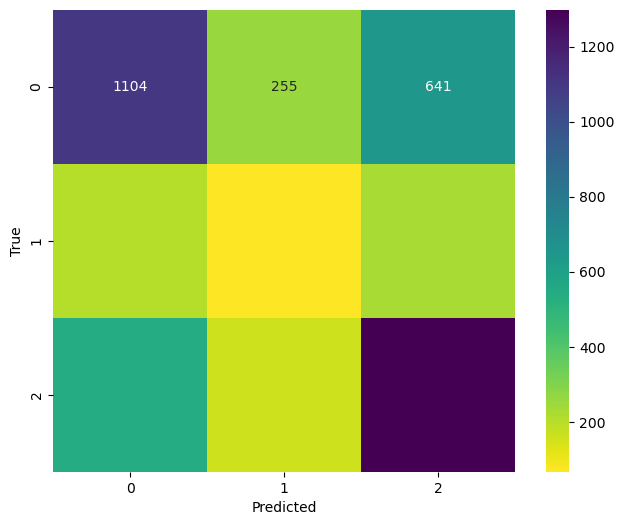

In [36]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

## Performance Assessment

### Negative Sentiment Prediction Assessment

In [37]:
tp, tn, fp, fn = 1088, 70+242+142+1310, 265+647, 188+547

In [38]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

In [39]:
print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.5968184311574328
precission: 0.544
f1 score: 0.5691865027465342


### Positive Sentiment Prediction Assessment

In [40]:
tp, tn, fp, fn = 1310, 1088+265+70+188, 242+647, 142+547

In [41]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

In [42]:
print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.655327663831916
precission: 0.5957253296953161
f1 score: 0.6241067174845164


## Sentiment Scoring Model Using NLTK Opinion Lexicon

In [43]:
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize, sent_tokenize

In [51]:
nltk.download("opinion_lexicon")

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/paavansai/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [52]:
pos_words = list(opinion_lexicon.positive())
neg_words = list(opinion_lexicon.negative())

In [69]:
print(pos_words)
print(neg_words)

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'ag

In [46]:
def get_sentiment_score_oplex(text):
    
    """
        This method returns the sentiment score of a given text using nltk opinion lexicon.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0

    raw_sentences = sent_tokenize(text)
    
    for sentence in raw_sentences:

        sent_score = 0     
        sentence = str(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        for token in tokens:
            sent_score = sent_score + 1 if token in pos_words else (sent_score - 1 if token in neg_words else sent_score)
        total_score = total_score + (sent_score / len(tokens))

    
    return total_score

In [72]:
neg_comment ="The product is worst, never ever buy this kind of product."
pos_comment= "One of the best ones i have seen till date, don't miss it!"

pos_score=get_sentiment_score_oplex(pos_comment)
neg_score=get_sentiment_score_oplex(neg_comment)

print("positive comment score",pos_score)
print("negetive comment score",neg_score)

positive comment score 0.0
negetive comment score -0.07692307692307693


In [53]:
reviews['oplex_sentiment_score'] = reviews['reviewText'].apply(lambda x: get_sentiment_score_oplex(x))

In [70]:
reviews.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,swn_score,swn_sentiment,true_sentiment,oplex_sentiment_score,oplex_sentiment
0,1.0,False,"11 20, 2006",A1WR2JN6DQ8QDG,B0007M2220,Dee Williams,Ok this game had a neat concept when i was browsing the shelves at my college rental store for games to pick up. I get home and pop it in and it's the worse GTA wannabe game I've ever played and I've played a lot. The idea of having to kill cops is..whatever. The game itself has terrible control and graphics are very choppy\n\nThe A.I. seems to have a brain when it wants to but things are definitely out of wack with this game. In the very beginning of playing I got shot in the foot and my character died.,GTA..It is Not,1163980800,2,{'Platform:': ' Xbox'},NaN,0.119048,negative,negative,-0.285714,negative
1,1.0,True,"03 3, 2016",A15RW77GD0ACKP,B0016BVYAM,robert,Do not for anyreason buy this game it will not activate no matter what you do and 2k is no help in getting it to activate,Total waste of time and money,1456963200,NaN,{'Format:': ' Video Game'},NaN,-0.480769,negative,negative,0.000000,neutral
2,1.0,False,"11 18, 2005",A1FW98SHQL40L3,B000067FDY,Azaraphel,"I have played Star Wars: Galaxies for 782 days according to the /getvet command. I have purchased all of the expansions out to date. I was considering creating a second account. As of 11-17-05 my account is cancelled. The New Game, also known as the Starter Kit, is the third version of SWG and it is riddled with bugs and incomplete. It is a far inferior product to its previous versions as well. The NG was released after being kept secret for an unknown period of time and allowing players only a two week notice of it being published. Even less time was devoted to it being tested by sources outside of SOE. Trials of Obi Wan and the NG were released in such a manner as to call into question SOE's and LA's ethics. As represented by the employees who post to the forums SOE and LA are uncarring, glib, and/or vastly out of touch with the player community.\n\nMost of these are not new complaints. However, with the release of the NG these problems have escalted to such a degree that the game is no longer playable. While some are content to merely switch games I am not. Simply changing the direction of the flow of money to SOE and LA will not get their attention. I am boycotting all products created by Sony Online Entertainment and Lucas Arts. I encourage others to do the same.\n\nI do not think my actions alone with effect SOE or LA one iota. In fact, I doubt anything will change their policies. The fan base for Star Wars and other properties is sufficiently numerous to mitigate any discontent portion. While some have predicted that the NG will cause the collapse of SWG I believe otherwise. It will lose many current players but those will be replaced by SOE's and LA's new target market. SOE and LA will later use the negative comments and future subscriptions numbers to prove that they were right all along and to dismiss anyone who opposes them as being knee jerk reactionaries who are against change just because they don't like change. Because most likely the next expansion will also bring a new version of SWG as SOE and LA attempt to copy whichever game is doing better then.",Boycott Sony Online Entertainment and Lucas Arts.,1132272000,4,NaN,NaN,-0.253165,negative,negative,-0.349367,negative
3,1.0,True,"04 7, 2015",A37PQG6TMGTKO2,B0007KTBB2,Tony,Was too violent.,One Star,1428364800,NaN,{'Platform:': ' PlayStation2'},NaN,0.000000,negative,negative,-0.250000,negative
4,1.0,False,"05 1, 2001",AGX7PLR4MIZHR,B00000J9J9,Rob C,"Yes, people, this game sucks big time. This game came with the original Nintendo system back in late 1980s. I had a hard time trying to beat this game because the control was down right horrible. Most of the time you'll jump off edges by accident. And who ... would pay ... to relive the nightmare of this game? Apparen

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


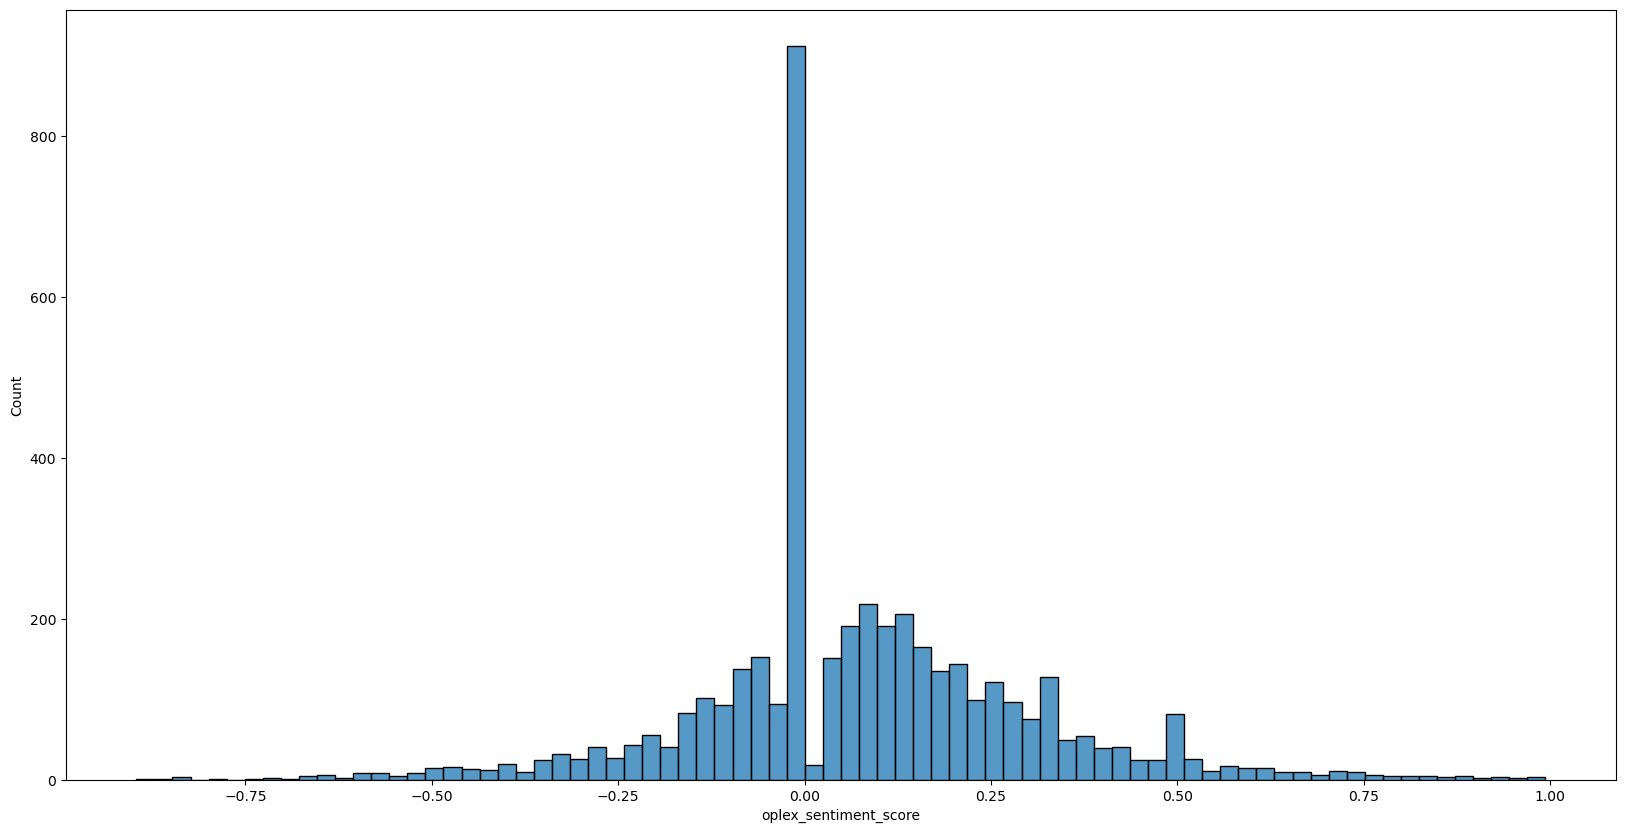

In [71]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='oplex_sentiment_score',\
             data=reviews.query("oplex_sentiment_score < 1 and oplex_sentiment_score>-1"), ax=ax)
plt.show()

In [55]:
reviews['oplex_sentiment'] = \
    reviews['oplex_sentiment_score'].apply(lambda x: "positive" if x>0.1 else ("negative" if x<0 else "neutral"))

In [56]:
reviews['oplex_sentiment'].value_counts(dropna=False)

oplex_sentiment
positive    1876
neutral     1510
negative    1113
Name: count, dtype: int64

<Axes: xlabel='overall', ylabel='count'>

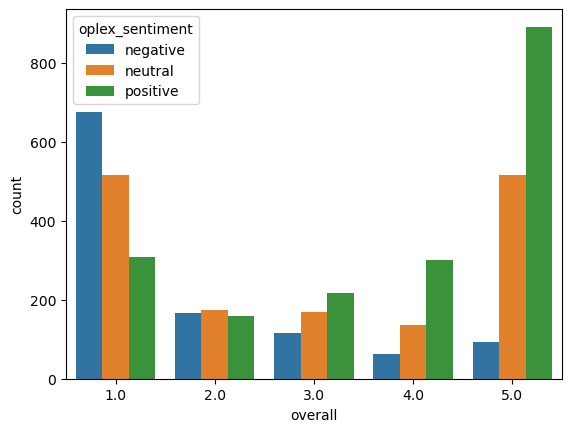

In [57]:
sns.countplot(x='overall', hue='oplex_sentiment' ,data = reviews)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='oplex_sentiment', ylabel='overall'>

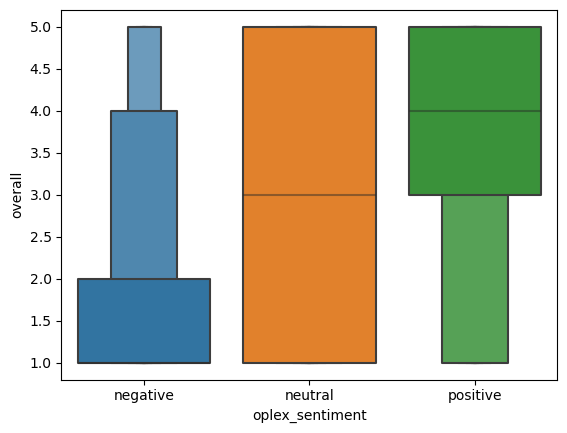

In [58]:
sns.boxenplot(x='oplex_sentiment', y='overall', data = reviews)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

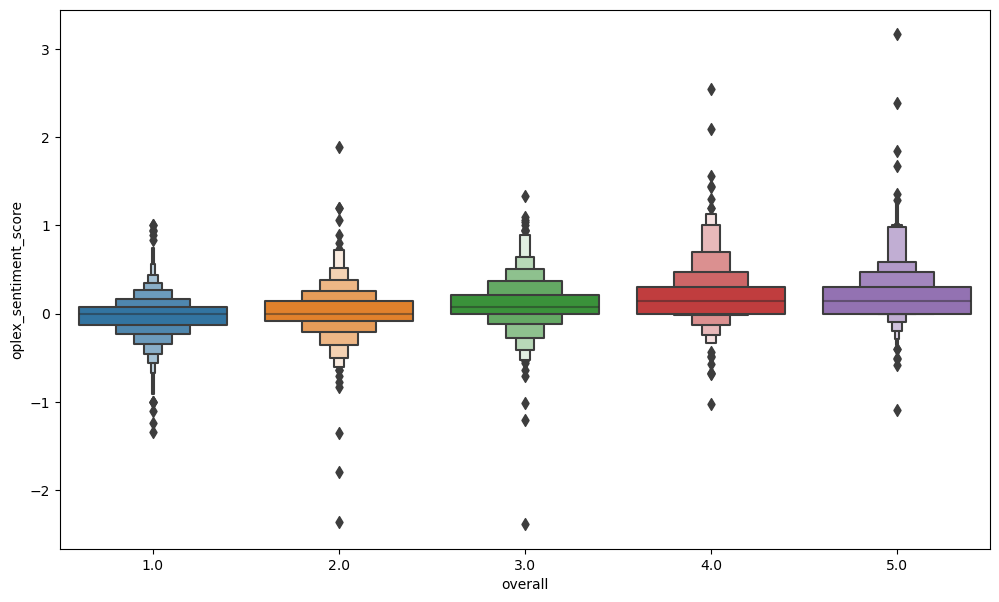

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='overall', y='oplex_sentiment_score', data = reviews, ax=ax)
plt.show()

In [60]:
y_oplex_pred = reviews['oplex_sentiment'].tolist()

In [61]:
oplex_cm = confusion_matrix(y_true, y_oplex_pred)

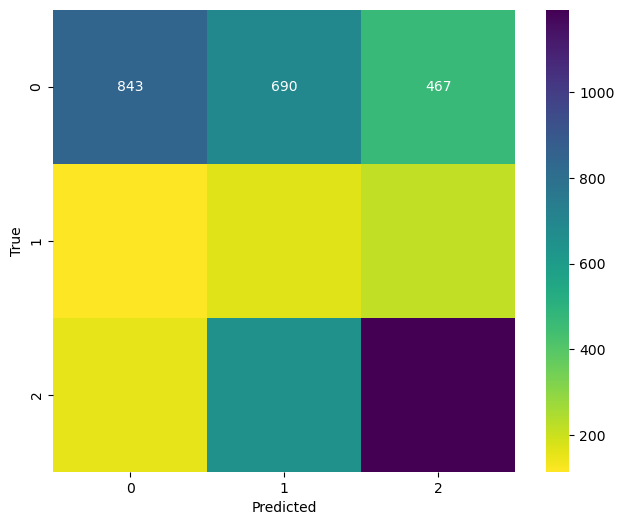

In [62]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(oplex_cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

In [63]:
oplex_cm = list(oplex_cm.ravel())

In [64]:
oplex_cm

[843, 690, 467, 115, 168, 217, 155, 652, 1192]

### Negative Label Assessment

In [65]:
tp, tn, fp, fn = 804, 195+199+686+1181, 106+132, 701+495

In [66]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.402
precission: 0.7715930902111324
f1 score: 0.5285996055226825


### Positive Label Assessment

In [67]:
tp, tn, fp, fn = 1181, 804+701+106+195, 495+199, 132+686

In [68]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.5907953976988495
precission: 0.6298666666666667
f1 score: 0.6097057305110997
